# Bank Transaction Classifier
## Model Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

# Area Under the Precision-Recall Curve 
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, auc, average_precision_score

### Import data

In [2]:
%%time

# import training and test data
PATH_train = (r'assets\santander\train_clean.csv')
PATH_test = (r'assets\santander\test_clean.csv')

train_data = pd.read_csv(PATH_train, index_col=0)
test_data = pd.read_csv(PATH_test, index_col=0)

df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

display(df_train.head())

,target,0,1,2,3,4,5,6,7,8,...,76,77,78,79,80,81,82,83,84,85
0,0,-0.027133,0.142831,-0.111250,0.143562,0.004239,-0.071815,0.337378,0.218159,0.189081,...,-0.005709,-0.129544,-0.099462,-0.012352,-0.045079,-0.046897,-0.043987,0.064105,-0.013727,-0.128452
1,0,0.150981,0.330123,0.089315,-0.192914,-0.170878,-0.151223,0.007596,-0.114647,-0.097730,...,0.040397,-0.153714,0.253848,0.214468,-0.036794,-0.130433,-0.061869,-0.079233,0.044787,-0.055746
2,0,0.054292,0.222968,0.016821,0.262956,0.025092,0.004047,0.179983,0.136441,0.014935,...,-0.010997,0.113560,0.022930,0.047859,0.127231,0.139168,-0.000719,-0.066721,0.103822,0.070443
3,0,-0.030226,-0.150338,0.325219,-0.326716,-0.101473,0.108594,-0.067955,-0.268760,-0.112723,...,-0.134556,0.025619,-0.177989,-0.049176,0.234301,-0.127792,0.001177,-0.036717,0.151785,-0.106692
4,0,0.015250,-0.142634,-0.316099,0.323023,0.001129,0.059206,-0.077948,0.238951,0.193648,...,0.192886,-0.106981,-0.200711,0.092928,0.127197,-0.018342,-0.071950,-0.000997,0.005745,-0.377629


Wall time: 6min 37s


### Reduce memory usage

In [3]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Train, test, split

In [4]:
#
data = df_train.drop('target', axis=1)
target = df_train['target']
features = [c for c in data.columns]
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)

## Logistic Regression

In [5]:
%%time

#
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', random_state=42)
# Train the classifier
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
# metrics
lr_metrics = {}
lr_metrics['Accuracy score'] = accuracy_score(y_test, y_pred)
lr_metrics['Mean absolute error'] = mean_absolute_error(y_test, y_pred)
lr_metrics['Mean squared error'] = mean_squared_error(y_test, y_pred)

Wall time: 18 s


### Confusion matrix

Recall metric in the training dataset: 77.16962524654832%
Precision metric in the training dataset: 76.76918293217248%


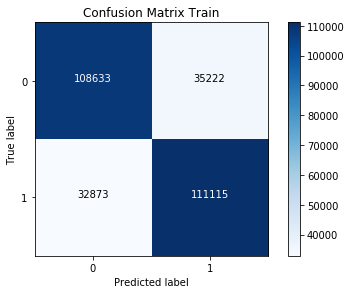

In [6]:
# predict training values
y_pred_train = LR.predict(X_train)
# plot training values
cnf_matrix = confusion_matrix(y_train, y_pred_train)
# display and store metrics
lr_metrics['Train Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the training dataset: {}%".format(lr_metrics['Train Recall metric'])
     )
lr_metrics['Train Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the training dataset: {}%".format(lr_metrics['Train Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Train')
plt.savefig('assets\logistic_conf_train.png')
plt.show()

Recall metric in the testing dataset: 76.39917580887676%
Precision metric in the testing dataset: 76.29555052157619%


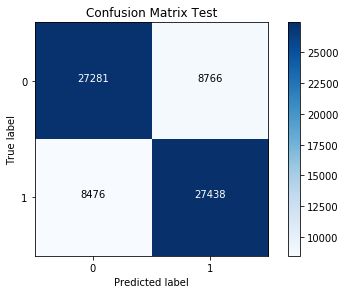

In [7]:
# plot test values
cnf_matrix = confusion_matrix(y_test, y_pred)
# display and store metrics
lr_metrics['Test Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the testing dataset: {}%".format(lr_metrics['Test Recall metric'])
     )
lr_metrics['Test Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the testing dataset: {}%".format(lr_metrics['Test Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Test')
plt.savefig('assets\logistic_conf_test.png')
plt.show()

### ROC curve

ROC-AUC: 0.760


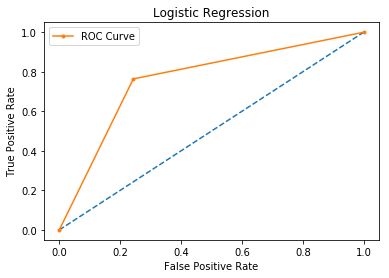

In [8]:
# calculate AUC
lr_metrics['ROC-AUC'] = auc_score = roc_auc_score(y_test, y_pred)
print('ROC-AUC: %.3f' % lr_metrics['ROC-AUC'])
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('assets\logistic_ROC.png')
plt.show()

### Precision-recall curve

f1=0.761 auc=0.820 ap=0.697


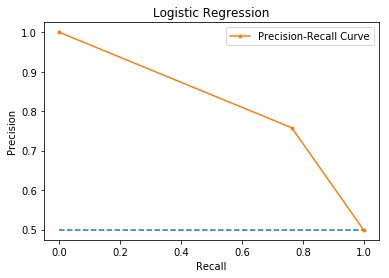

In [9]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
lr_metrics['F1 score'] = f1_score(y_test, y_pred)
# calculate precision-recall AUC
lr_metrics['Precision-Recall AUC'] = auc(recall, precision)
# calculate average precision score
lr_metrics['Average Precision'] = average_precision_score(y_test, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (lr_metrics['F1 score'],
                                    lr_metrics['Precision-Recall AUC'],
                                    lr_metrics['Average Precision']))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('assets\logistic_precision_recall.png')
plt.show()

### Metrics

In [10]:
# view metrics
print('Logistic Regression')
for i in lr_metrics.items():
    print(i)

Logistic Regression
('Accuracy score', 0.7603979933575131)
('Mean absolute error', 0.2396020066424869)
('Mean squared error', 0.2396020066424869)
('Train Recall metric', 77.16962524654832)
('Train Precision metric', 76.76918293217248)
('Test Recall metric', 76.39917580887676)
('Test Precision metric', 76.29555052157619)
('ROC-AUC', 0.7604046231839793)
('F1 score', 0.7609196039823622)
('Precision-Recall AUC', 0.8198249197047677)
('Average Precision', 0.6967940292392188)


## Random Forest

In [12]:
#
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
# instantiate Random Forest Classifier
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

# metrics
rfc_metrics = {}
rfc_metrics['Accuracy score'] = accuracy_score(y_test, y_pred)
rfc_metrics['Mean absolute error'] = mean_absolute_error(y_test, y_pred)
rfc_metrics['Mean squared error'] = mean_squared_error(y_test, y_pred)

### Confusion matrix

Recall metric in the training dataset: 100.0%
Precision metric in the training dataset: 100.0%


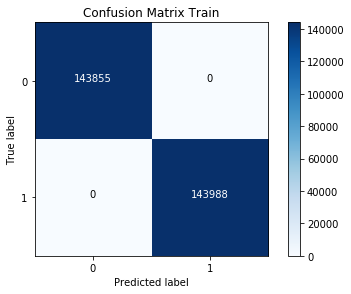

In [13]:
# predict training values
y_pred_train = RFC.predict(X_train)
# plot training values
cnf_matrix = confusion_matrix(y_train, y_pred_train)
# display and store metrics
rfc_metrics['Train Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the training dataset: {}%".format(rfc_metrics['Train Recall metric'])
     )
rfc_metrics['Train Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the training dataset: {}%".format(rfc_metrics['Train Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Train')
plt.savefig('assets/random_forest_conf_train.png')
plt.show()

Recall metric in the testing dataset: 92.39850754580387%
Precision metric in the testing dataset: 92.15472153572044%


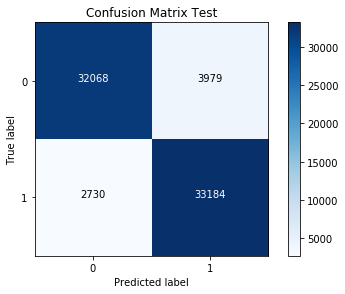

In [14]:
# plot test values
cnf_matrix = confusion_matrix(y_test, y_pred)
# display and store metrics
rfc_metrics['Test Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the testing dataset: {}%".format(rfc_metrics['Test Recall metric'])
     )
rfc_metrics['Test Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the testing dataset: {}%".format(rfc_metrics['Test Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Test')
plt.savefig('assets/random_forest_conf_test.png')
plt.show()

### ROC curve

ROC-AUC: 0.907


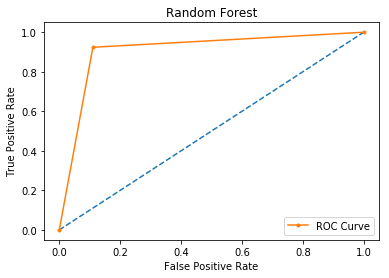

In [15]:
# calculate AUC
rfc_metrics['ROC-AUC'] = auc_score = roc_auc_score(y_test, y_pred)
print('ROC-AUC: %.3f' % rfc_metrics['ROC-AUC'])
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('assets/random_forest_ROC.png')
plt.show()

### Precision-recall curve

f1=0.908 auc=0.927 ap=0.863


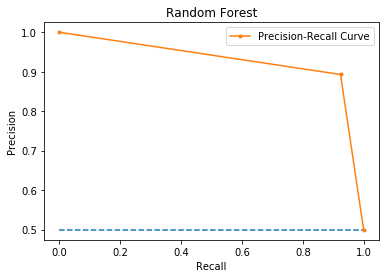

In [16]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
rfc_metrics['F1 score'] = f1_score(y_test, y_pred)
# calculate precision-recall AUC
rfc_metrics['Precision-Recall AUC'] = auc(recall, precision)
# calculate average precision score
rfc_metrics['Average Precision'] = average_precision_score(y_test, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (rfc_metrics['F1 score'],
                                    rfc_metrics['Precision-Recall AUC'],
                                    rfc_metrics['Average Precision']))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('assets/random_forest_precision_recall.png')
plt.show()

### Metrics

In [17]:
# view metrics
print('Random Forest')
for i in rfc_metrics.items():
    print(i)

Random Forest
('Accuracy score', 0.9067689442892678)
('Mean absolute error', 0.0932310557107322)
('Mean squared error', 0.0932310557107322)
('Train Recall metric', 100.0)
('Train Precision metric', 100.0)
('Test Recall metric', 92.39850754580387)
('Test Precision metric', 92.15472153572044)
('ROC-AUC', 0.9068007048441744)
('F1 score', 0.9081927282181808)
('Precision-Recall AUC', 0.9274267163194255)
('Average Precision', 0.8629922638621771)


## Light Gradient Boosting

In [18]:
# instantiate Light GBM Classifier
from lightgbm import LGBMClassifier
CLF = LGBMClassifier(random_state=42)
CLF.fit(X_train, y_train)
y_pred = CLF.predict(X_test)
# metrics
lgbm_metrics = {}
lgbm_metrics['Accuracy score'] = accuracy_score(y_test, y_pred)
lgbm_metrics['Mean absolute error'] = mean_absolute_error(y_test, y_pred)
lgbm_metrics['Mean squared error'] = mean_squared_error(y_test, y_pred)

### Confusion matrix

Recall metric in the training dataset: 83.86948912409368%
Precision metric in the training dataset: 83.74872304398326%


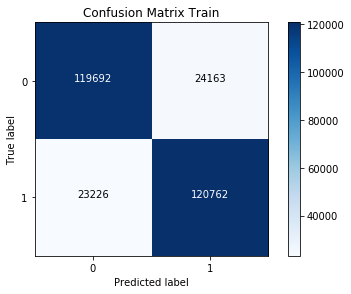

In [19]:
# predict training values
y_pred_train = CLF.predict(X_train)
# plot training values
cnf_matrix = confusion_matrix(y_train, y_pred_train)
# display and store metrics
lgbm_metrics['Train Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the training dataset: {}%".format(lgbm_metrics['Train Recall metric'])
     )
lgbm_metrics['Train Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the training dataset: {}%".format(lgbm_metrics['Train Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Train')
plt.savefig('assets\light_gbm_conf_train.png')
plt.show()

Recall metric in the testing dataset: 82.5388427911121%
Precision metric in the testing dataset: 82.50913452151842%


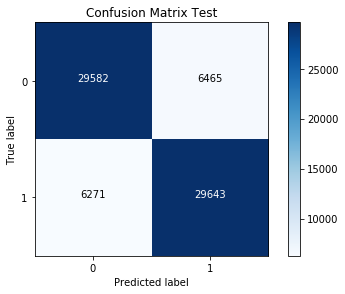

In [20]:
# plot test values
cnf_matrix = confusion_matrix(y_test, y_pred)
# display and store metrics
lgbm_metrics['Test Recall metric']=100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print("Recall metric in the testing dataset: {}%".format(lgbm_metrics['Test Recall metric'])
     )
lgbm_metrics['Test Precision metric'] = 100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])
print("Precision metric in the testing dataset: {}%".format(lgbm_metrics['Test Precision metric'])
     )
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion Matrix Test')
plt.savefig('assets\light_gbm_conf_test.png')
plt.show()

### ROC curve

ROC-AUC: 0.823


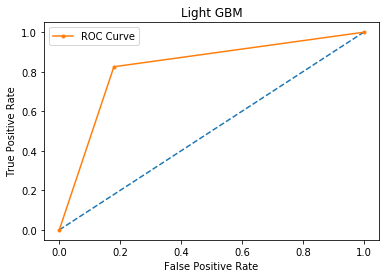

In [21]:
# calculate AUC
lgbm_metrics['ROC-AUC'] = auc_score = roc_auc_score(y_test, y_pred)
print('ROC-AUC: %.3f' % lgbm_metrics['ROC-AUC'])
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.title('Light GBM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.savefig('assets\light_gbm_ROC.png')
plt.show()

### Precision-recall curve

f1=0.823 auc=0.867 ap=0.765


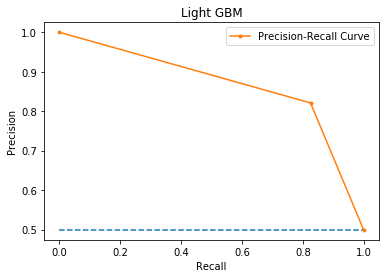

In [22]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
lgbm_metrics['F1 score'] = f1_score(y_test, y_pred)
# calculate precision-recall AUC
lgbm_metrics['Precision-Recall AUC'] = auc(recall, precision)
# calculate average precision score
lgbm_metrics['Average Precision'] = average_precision_score(y_test, y_pred)
print('f1=%.3f auc=%.3f ap=%.3f' % (lgbm_metrics['F1 score'],
                                    lgbm_metrics['Precision-Recall AUC'],
                                    lgbm_metrics['Average Precision']))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title('Light GBM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('assets\light_gbm_precision_recall.png')
plt.show()

### Metrics

In [23]:
# view metrics
print('Light GBM')
for i in lgbm_metrics.items():
    print(i)

Light GBM
('Accuracy score', 0.8230152443684774)
('Mean absolute error', 0.17698475563152263)
('Mean squared error', 0.17698475563152263)
('Train Recall metric', 83.86948912409368)
('Train Precision metric', 83.74872304398326)
('Test Recall metric', 82.5388427911121)
('Test Precision metric', 82.50913452151842)
('ROC-AUC', 0.8230196224500259)
('F1 score', 0.8231651439837828)
('Precision-Recall AUC', 0.8667433293073552)
('Average Precision', 0.7647501961563802)
